In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#General information about GEM dataset

Link to code explanation/interpratation (16 min): https://panopto.aau.dk/Panopto/Pages/Viewer.aspx?id=a931ec7c-d1ca-4e24-8c8c-b1f40114b684

**Global Entrepreneurship Monitor (GEM)**

Link to dataset: https://github.com/aaubs/ds-master/blob/main/data/assignments_datasets/GEM/GEM%202020%20APS%20Global%20Individual%20Level%20Data_Jan2022.parquet

This dataset is the world's foremost study of global entrepereurship. Its primary goal is to explore the entrepreneurial behavior of individuals, how entrepreneurship affects national economic development, and the various factors that promote or hinder entrepreneurial activity across different countries and regions.

The Global Entrepreneurship Monitor plays a crucial role in advancing the understanding of entrepreneurship’s role in economic development and social progress. Its data is valuable for researchers, policymakers, educators, and business leaders who seek to foster entrepreneurial ecosystems that drive innovation, job creation, and economic growth.

**Research focus**

In general i am curious about the relation between multipple chosen values and how they might relate. However what I am most curious about is fear of failure and its relation to other highlighted columns whithin the specified dataset (df). In order to satiate my curiosity in these matters i will ascess the data, potentially clean-up the data, perform descriptive statistics, and dig further into my chosen research focus.

The purpose of this assignment is to do the following:

- apply k-means and hierarchical clustering to the dataset.
- Build a recommendation engine.
- Visualize the clustering results using appropriate plots.
- Analyze the clusters and explain what they represent in terms of the data's features.

**List of collumns in dataset**

'id' = A unique respondent ID used to track individual responses in the dataset.

'country_name' = Name of the country the respondents are from

'proact' = Level of proactivity in seizing business opportunities.

'creativ' = The respondent’s self-assessed creativity, which could relate to innovation in business.

'vision' = Perceived vision or foresight in entrepreneurship.

In [18]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF
from sklearn.cluster import KMeans

# Load the Parquet file into a DataFrame
file_path = '/content/drive/MyDrive/Universitet/Kandidat - Business Data Science/1. Semester/GEM 2020 APS Global Individual Level Data_Jan2022.parquet'
data = pd.read_parquet(file_path, engine='pyarrow')

In [21]:
data.head()

,country,country_name,ctryalp,setid,id,region,wbinc,wbincrev,yrsurv,gender,...,su_cpgovres,bb_cpgovres,eb_cpgovres,teacpgovres,futsup_cp_sm,futsup_cp_hi,eea_stop,eea_newopp,eea_govres,eea_support
0,1.0,United States,US,1.200010e+11,1000172.0,4.0,4.0,3.0,2020.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,United States,US,1.200010e+11,1000392.0,4.0,4.0,3.0,2020.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,United States,US,1.200010e+11,1000453.0,4.0,4.0,3.0,2020.0,2.0,...,NaN,4.0,NaN,4.0,0.0,0.0,NaN,NaN,NaN,NaN
3,1.0,United States,US,1.200010e+11,1000502.0,4.0,4.0,3.0,2020.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,United States,US,1.200010e+11,1000521.0,4.0,4.0,3.0,2020.0,1.0,...,NaN,4.0,NaN,4.0,1.0,0.0,NaN,NaN,NaN,NaN


In [45]:
df = data[['id', 'country_name', 'proact', 'creativ',  'vision']]

In [46]:
df.head()

,id,country_name,proact,creativ,vision
0,1000172.0,United States,5.0,4.0,4.0
1,1000392.0,United States,5.0,2.0,5.0
2,1000453.0,United States,5.0,5.0,4.0
3,1000502.0,United States,5.0,2.0,5.0
4,1000521.0,United States,4.0,5.0,5.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141403 entries, 0 to 141402
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            141403 non-null  float64
 1   country_name  141403 non-null  object 
 2   proact        96357 non-null   float64
 3   creativ       90516 non-null   float64
 4   vision        96376 non-null   float64
dtypes: float64(4), object(1)
memory usage: 5.4+ MB


In [48]:
df_rec = df.dropna()

In [49]:
df_rec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88021 entries, 0 to 141402
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            88021 non-null  float64
 1   country_name  88021 non-null  object 
 2   proact        88021 non-null  float64
 3   creativ       88021 non-null  float64
 4   vision        88021 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.0+ MB


# Applying K-means and hierarchical clustering to the dataset

The purpose of this part is to simplify the complexity of the GEM dataset while retaining trends/patterns. This approach works well with a lot of items.

In [89]:
X = df_rec[['vision', 'proact']].values
respondent_names = df_rec['id'].values
k = 4

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [90]:
y_kmeans

array([0, 0, 0, ..., 0, 1, 2], dtype=int32)

In [30]:
# The data set is too big for google colab to run due to the large requirements for ram space...
# In order to display the k-means calculation in a plot a limited amount of the dataframe is used
X_sample=X[:10000]
y_kmeans_sample=y_kmeans[:10000]

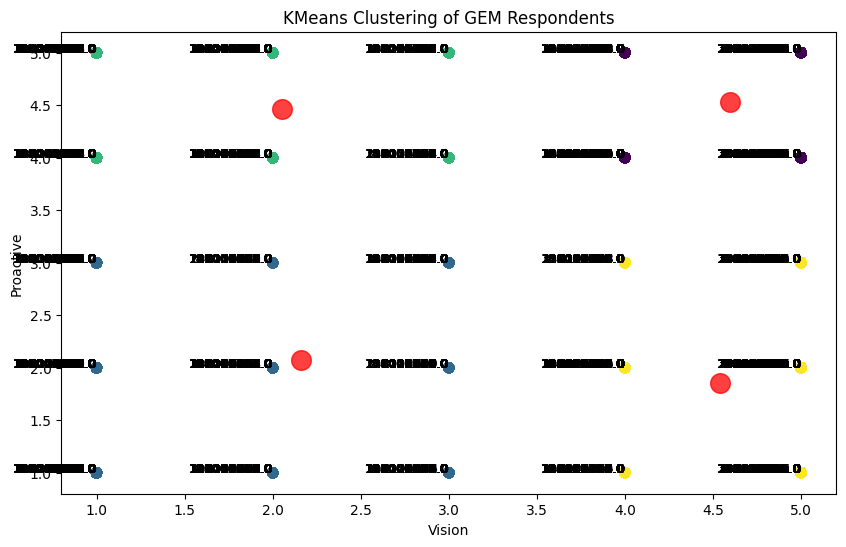

In [31]:
#@title plot

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_sample[:, 0], X_sample[:, 1], c=y_kmeans_sample, s=50, cmap='viridis')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)

# Annotate each player on the scatter plot
for i, respondent in enumerate(respondent_names[:10000]):
    plt.text(X_sample[i, 0], X_sample[i, 1], respondent, fontsize=9, ha='right')

# Add labels and title
plt.xlabel('Vision')
plt.ylabel('Proactive')
plt.title('KMeans Clustering of GEM Respondents')

plt.show()

In [82]:
# Here is a more ideal eksample: https://miro.medium.com/v2/resize:fit:1400/1*IS2Y1GYRP7b5jEDCeqlQeg.png
from IPython.display import Image, display
display(Image(url='https://miro.medium.com/v2/resize:fit:1400/1*IS2Y1GYRP7b5jEDCeqlQeg.png'))

In [32]:
!pip install kmodes --q

In [35]:
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11830.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 11830.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 11830.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 11830.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 11830.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9806.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 10815.0
Init: initializing centroids
Init: initializing clusters
Starting iterations

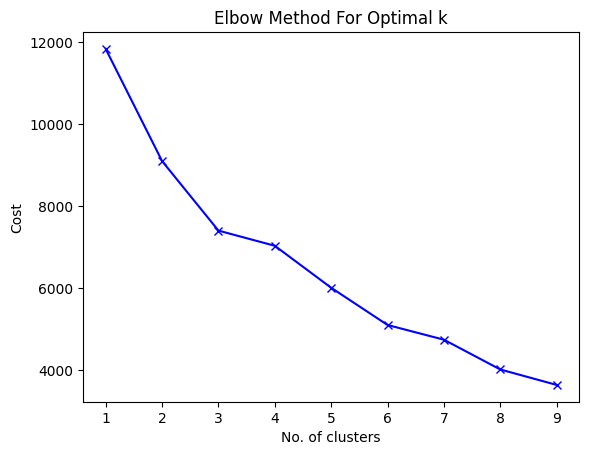

In [36]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(X_sample)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

This model identifies the density of clusters and distance between clusters and plots them to illustrate greater density (good) and bigger distance (good)

In [37]:
result_df = pd.DataFrame(data, columns=['vision', 'proact'])

# Hierarchical clustering - Bottom up

This works well with a small amount of items 10-100 ca.

In [41]:
# So in order to display this appoach I will isolate the first 12 respondents from the dataframe
df_h = df_rec[:12]

In [42]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=3).fit(df_h[['vision', 'proact']])
agg_cluster.labels_

array([1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2])

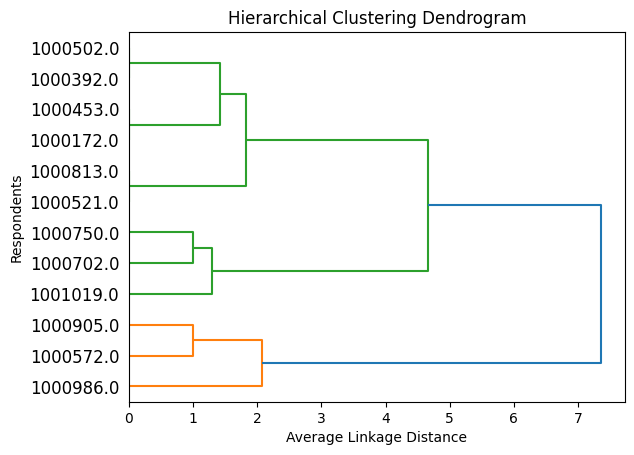

In [43]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(df_h[['vision', 'proact']], method='ward', metric='euclidean')
dendrogram(linkage_matrix, labels=df_h.id.values, orientation='right')

# # Add labels and show the plot
plt.xlabel('Average Linkage Distance')
plt.ylabel('Respondents')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [77]:
# this could also be done based of countries
df_h2 = df_rec[df_rec['country_name'] == 'United States']
df_h2.head()

,id,country_name,proact,creativ,vision
0,1000172.0,United States,5.0,4.0,4.0
1,1000392.0,United States,5.0,2.0,5.0
2,1000453.0,United States,5.0,5.0,4.0
3,1000502.0,United States,5.0,2.0,5.0
4,1000521.0,United States,4.0,5.0,5.0


In [78]:
agg_cluster = AgglomerativeClustering(n_clusters=3).fit(df_h2[['vision', 'proact']])
agg_cluster.labels_

array([1, 1, 1, ..., 1, 2, 1])

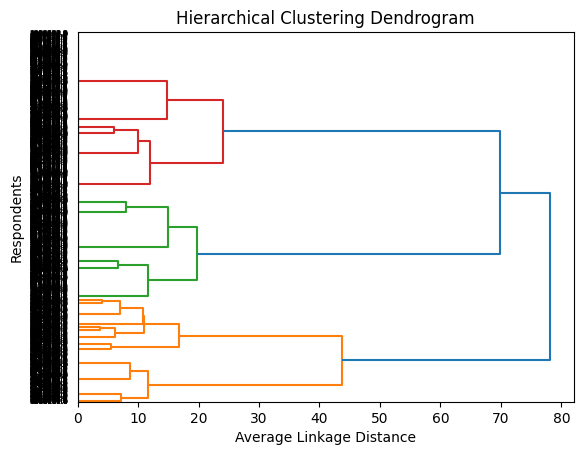

In [79]:
linkage_matrix = linkage(df_h2[['vision', 'proact']], method='ward', metric='euclidean')
dendrogram(linkage_matrix, labels=df_h2.id.values, orientation='right')

# # Add labels and show the plot
plt.xlabel('Average Linkage Distance')
plt.ylabel('Respondents')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Recommendation system

The purpose of this section is to create a recommendation-system which uses unsupervized machine learning to produce recommendations based of of...

In [67]:
# Item-based approach to recommendationsystem
# Label encoding and matrix creation
#le_items_userid = LabelEncoder()
#le_items_vision = LabelEncoder()

#df_rec['id'] = le_items_userid.fit_transform(df_rec.id)
#df_rec['vision'] = le_items_vision.fit_transform(df_rec.vision)

matrix_items_vision = df.groupby(['vision','id'])['vision'].agg('mean').unstack().fillna(0)

# Perform Dimensionality Reduction
svd_e = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
matrix_items_vision_dr = svd_e.fit_transform(matrix_items_vision)

# Calculate the Similarity Matrix
cosine_similarity_matrix_items_vision = cosine_distances(matrix_items_vision_dr)

# Create function
def recommender_vision(vision, n_recs):
    if (vision < 6) & (vision > 0):
        vision = np.argsort(cosine_similarity_matrix_items_vision[int(vision - 1), :])[:n_recs] + 1
        return vision
    else:
        return 'Vision not in the dataset'

In [68]:
recommender_vision(4.0, 3)

array([4, 3, 2])